# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date = datetime.datetime.fromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bardai
Processing Record 2 of Set 1 | queenstown
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | cabedelo
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | colares
Processing Record 15 of Set 1 | prince rupert
Processing Record 16 of Set 1 | kharan
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | chicxulub puerto
City not found. Skipping...
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(
    city_data
)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bardai,11.6500,7.2333,18.85,19,28,4.53,NG,2024-02-02
1,queenstown,-31.8976,26.8753,20.71,79,99,0.47,ZA,2024-02-02
2,ribeira grande,38.5167,-28.7000,17.22,94,40,6.17,PT,2024-02-02
3,ust-nera,64.5667,143.2000,-29.44,100,100,1.05,RU,2024-02-02
4,grytviken,-54.2811,-36.5092,6.34,70,98,7.01,GS,2024-02-02


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,18.85,19,28,4.53,NG,2024-02-02
1,queenstown,-31.8976,26.8753,20.71,79,99,0.47,ZA,2024-02-02
2,ribeira grande,38.5167,-28.7000,17.22,94,40,6.17,PT,2024-02-02
3,ust-nera,64.5667,143.2000,-29.44,100,100,1.05,RU,2024-02-02
4,grytviken,-54.2811,-36.5092,6.34,70,98,7.01,GS,2024-02-02


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

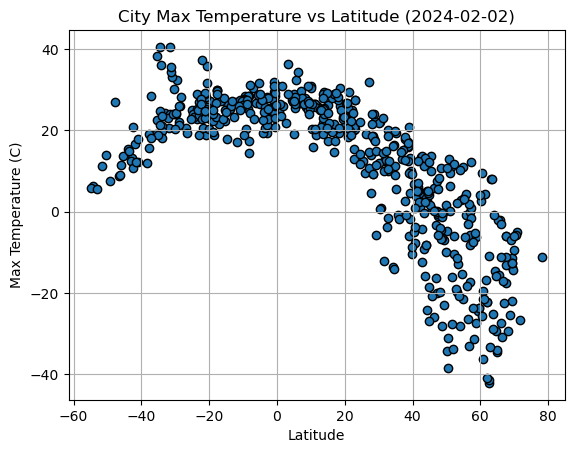

In [23]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date = city_data_df["Date"][0]
plt.title(f"City Max Temperature vs Latitude ({date})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

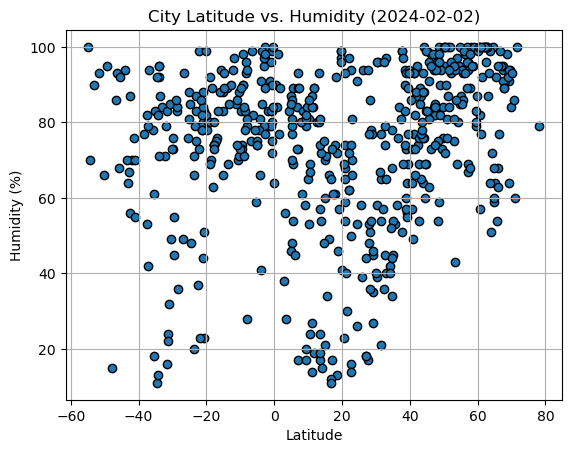

In [24]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

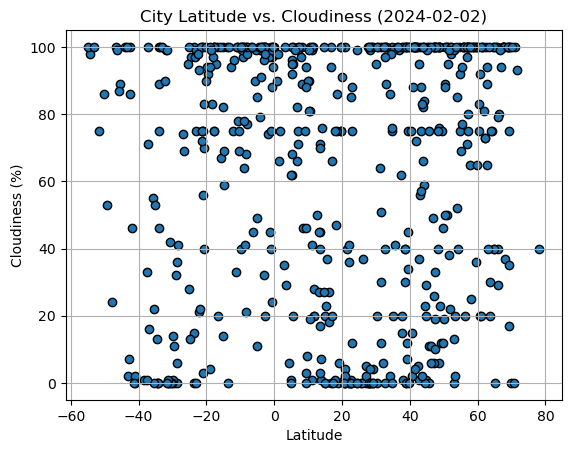

In [25]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

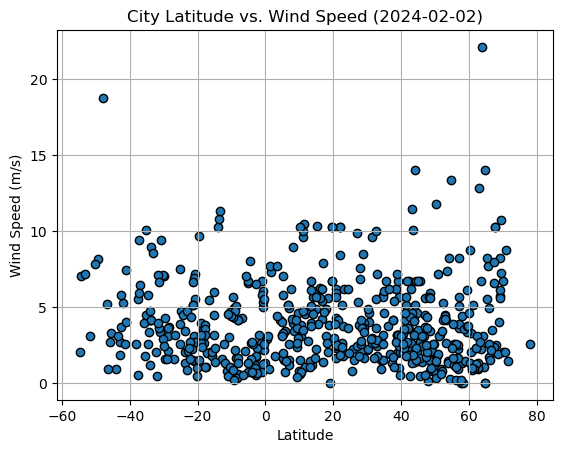

In [26]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression(x_data, y_data, xlabel, ylabel):
    lr = linregress(x_data, y_data)

    slope = lr.slope
    y_int = lr.intercept

    #plot the scatter 
    plt.scatter(x_data, y_data)

    #regression line
    plt.plot(x_data, x_data*slope + y_int, color = 'r')

    #labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs. {xlabel}")

    #equation text
    equation_text = f"y = {round(slope, 2)}x + {round(y_int, 2)}"
    x = x_data.min() + (x_data.max() - x_data.min())/6
    y = y_data.min() + (y_data.max() - y_data.min())*1/4
    plt.text(x, y, equation_text, fontsize=20, color = "red")

    #r value text
    x = x_data.min() - (x_data.max() - x_data.min())/8
    y = y_data.max() + (y_data.max() - y_data.min())/8
    r_value_text = f"The r-value is: {lr.rvalue}"
    plt.text(x, y, r_value_text, fontsize=10)

    plt.show()

    #returns the linear regression data
    return lr

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,18.85,19,28,4.53,NG,2024-02-02
2,ribeira grande,38.5167,-28.7000,17.22,94,40,6.17,PT,2024-02-02
3,ust-nera,64.5667,143.2000,-29.44,100,100,1.05,RU,2024-02-02
13,colares,38.7992,-9.4469,15.99,73,0,3.13,PT,2024-02-02
14,prince rupert,54.3161,-130.3201,2.83,80,40,8.23,CA,2024-02-02


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,queenstown,-31.8976,26.8753,20.71,79,99,0.47,ZA,2024-02-02
4,grytviken,-54.2811,-36.5092,6.34,70,98,7.01,GS,2024-02-02
5,port mathurin,-19.6833,63.4167,27.32,78,94,9.69,MU,2024-02-02
6,port elizabeth,-33.9180,25.5701,21.17,95,100,4.12,ZA,2024-02-02
7,cabedelo,-6.9811,-34.8339,30.37,75,100,4.25,BR,2024-02-02


###  Temperature vs. Latitude Linear Regression Plot

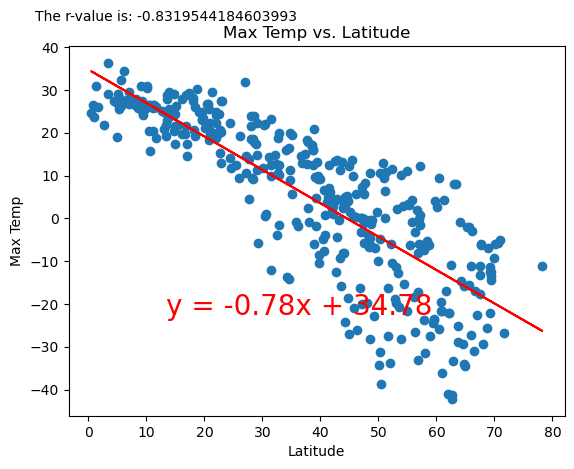

The r-value is: -0.8319544184603993


In [30]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")
print(f"The r-value is: {lr_data.rvalue}")

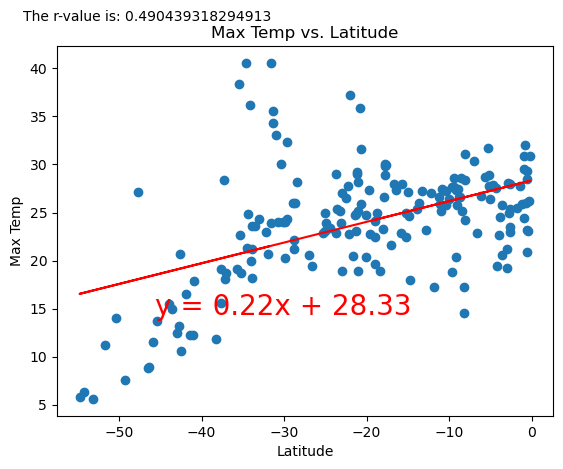

The r-value is: 0.490439318294913


In [31]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")
print(f"The r-value is: {lr_data.rvalue}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the linear relationship between max temp vs. latitude in the northern hemisphere, there is a strong negative correlation as r = -0.83. This means that as latitude increases in the northern hemisphere, the max temperature decreases.
For the linear relationship between max temp vs. latitude in the southern hemisphere, there is a moderate positive correlation as r = 0.49. This means that there is a slight trend where as the latitude increases, the temeperature increases.
These results are expected as we are moving away from the equator and towards the equator for norther and south hemisphere, respectively.  

### Humidity vs. Latitude Linear Regression Plot

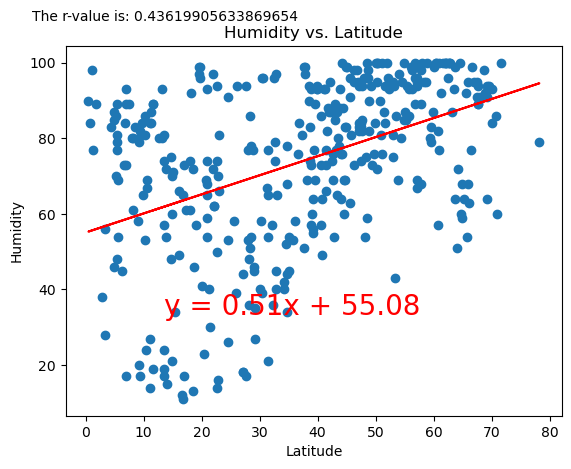

The r-value is: 0.43619905633869654


In [32]:
# Northern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude","Humidity" )
print(f"The r-value is: {lr_data.rvalue}")

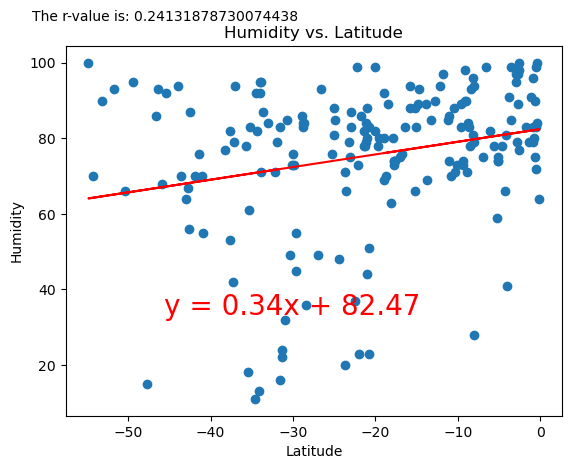

The r-value is: 0.24131878730074438


In [33]:
# Southern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude","Humidity")
print(f"The r-value is: {lr_data.rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the relationship between latitude and humidity in the northern hemisphere, there is a low positive correaltion as r = .43. This means that there is a slight trend that as latitude increases, the humidity increases.
Similar to the northern hemisphere, the southern hemisphere also experiences a low positive correaltion as r = 0.24. This also means that there is only a slight trend that as latitude increasem the humidtiy increaes.
Based on the trends shown, there is a weak relationship between humidity and latitude in both northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

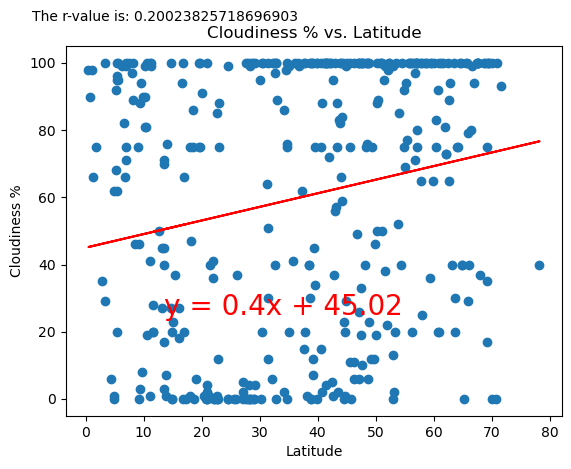

The r-value is: 0.20023825718696903


In [34]:
# Northern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness %")
print(f"The r-value is: {lr_data.rvalue}")

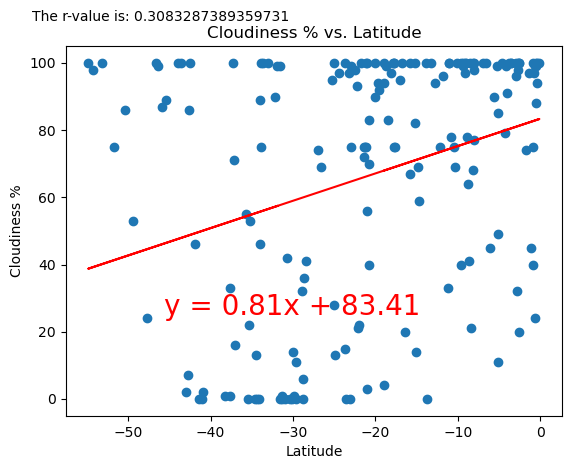

The r-value is: 0.3083287389359731


In [35]:
# Southern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness %")
print(f"The r-value is: {lr_data.rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the scatterplot and linear regression, there is a lower positive correlation between Cloudiness % and latitude in the northern and southern hemisphere they have an r value of .2 and .3 respectively. That means there is only a slight
trend that as latitude increaes, the cloudiness% increases. Bother northern and southern hemisphere shares similar trend in regard of these 2 variables.

### Wind Speed vs. Latitude Linear Regression Plot

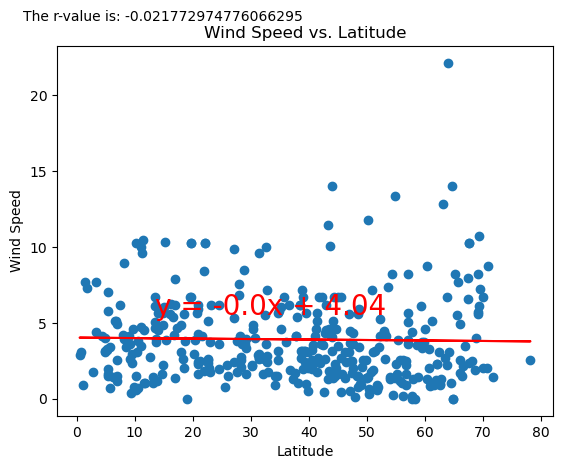

The r-value is: -0.021772974776066295


In [36]:
# Northern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")
print(f"The r-value is: {lr_data.rvalue}")

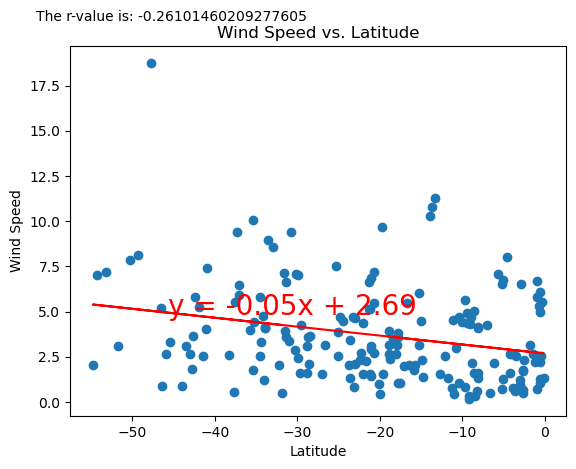

The r value is: -0.26101460209277605


In [37]:
# Southern Hemisphere
# YOUR CODE HERE
lr_data = create_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")
print(f"The r value is: {lr_data.rvalue}")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the relationships between Wind Speed and Latitude, both the northern and southern hemisphere share a none or low negative correlation where r = -.02 and -0.26, respectively. This means there there is a weak or no relationship between wind speed and latitide; as latitude increases, there is no change in wind speed.